In [1]:
from r3d2 import State, RiemannProblem, eos_defns, wave
from IPython.display import display, display_png, display_svg

In [6]:
gamma = 1.4
eos = eos_defns.eos_gamma_law(gamma)
q_left = State(1, 0, 0, 1, eos)
q_right = State(0.125, 0, 0, 0.1/(0.4*0.125), eos)

In [7]:
rp = RiemannProblem(q_left, q_right)

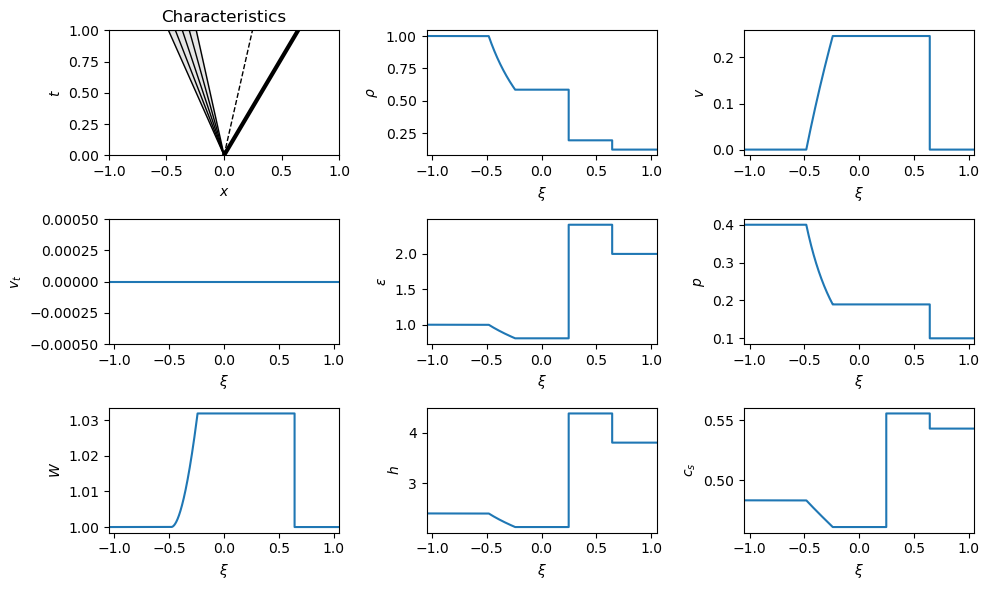

In [8]:
rp

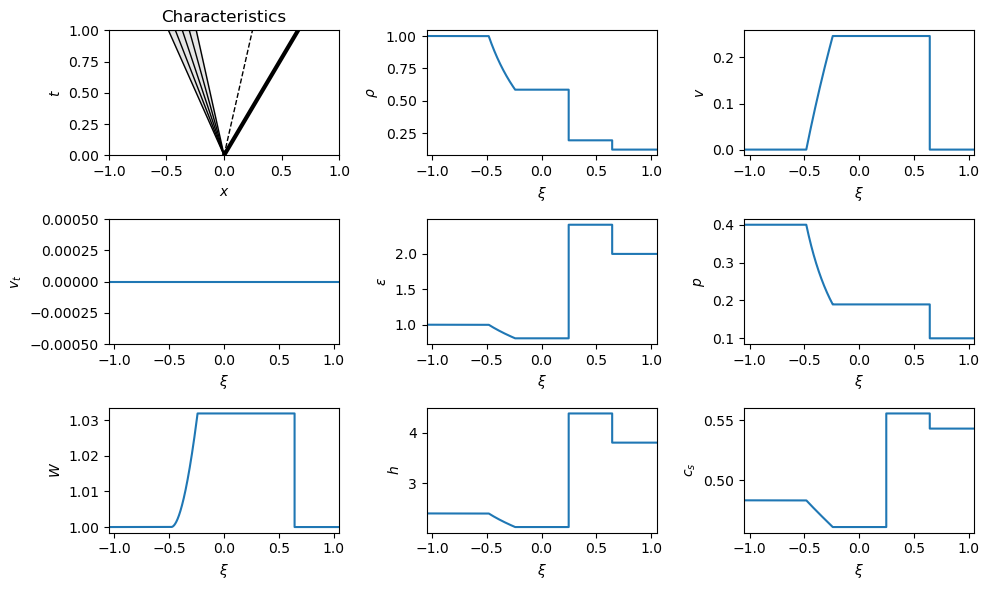

In [9]:
display_png(rp)

In [11]:
w=rp.waves[0]

In [17]:
rp.waves[1].wavespeed

[0.24660678555039783]

In [13]:
w.plotting_data()

(array([-0.48304589, -0.48273646, -0.48242659, -0.48211629, -0.48180556,
        -0.48149439, -0.48118279, -0.48087075, -0.48055827, -0.48024535,
        -0.47993199, -0.47961819, -0.47930395, -0.47898926, -0.47867413,
        -0.47835856, -0.47804254, -0.47772607, -0.47740916, -0.47709179,
        -0.47677398, -0.47645571, -0.47613699, -0.47581782, -0.47549819,
        -0.47517811, -0.47485757, -0.47453657, -0.47421512, -0.4738932 ,
        -0.47357083, -0.47324799, -0.47292469, -0.47260093, -0.4722767 ,
        -0.471952  , -0.47162684, -0.47130121, -0.47097511, -0.47064854,
        -0.4703215 , -0.46999399, -0.469666  , -0.46933753, -0.4690086 ,
        -0.46867918, -0.46834929, -0.46801891, -0.46768806, -0.46735672,
        -0.4670249 , -0.4666926 , -0.46635982, -0.46602654, -0.46569278,
        -0.46535853, -0.4650238 , -0.46468857, -0.46435285, -0.46401663,
        -0.46367992, -0.46334272, -0.46300502, -0.46266682, -0.46232812,
        -0.46198893, -0.46164923, -0.46130903, -0.4

In [15]:
rp.state_l.rho

1

In [37]:
import matplotlib
import matplotlib.pyplot as pyplot
import numpy

In [38]:
matplotlib.rcParams['font.size'] = 18

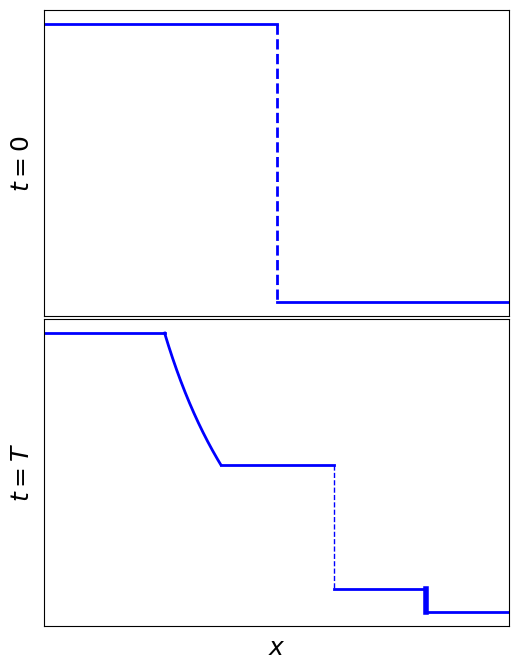

In [47]:
fig, axes = pyplot.subplots(2, 1, figsize=(6,8), sharex=True, gridspec_kw={'hspace':0.01})
x = numpy.array([-1, 0, 0, 1.0])
ql = rp.state_l.rho
qr = rp.state_r.rho
qcl = rp.state_star_l.rho
qcr = rp.state_star_r.rho
q = numpy.array([ql, ql, qr, qr])
axes[0].plot(x[:2], q[:2], 'b-', lw=2)
axes[0].plot(x[1:3], q[1:3], 'b--', lw=2)
axes[0].plot(x[2:], q[2:], 'b-', lw=2)
axes[0].set_ylabel(r'$t=0$')

wave_l_x = rp.waves[0].wavespeed
wave_c_x = rp.waves[1].wavespeed[0]
wave_r_x = rp.waves[2].wavespeed[0]

pd = rp.waves[0].plotting_data()
raref_x = pd[0]
raref_y = pd[1][:,0]
            
axes[1].plot([x[0], wave_l_x[0]], [ql, ql], 'b-', lw=2)
axes[1].plot(raref_x, raref_y, 'b-', lw=2)
axes[1].plot([wave_l_x[1], wave_c_x], [qcl, qcl], 'b-', lw=2)
axes[1].plot([wave_c_x, wave_r_x], [qcr, qcr], 'b-', lw=2)
axes[1].plot([wave_r_x, x[-1]], [qr, qr], 'b-', lw=2)
axes[1].plot([wave_c_x, wave_c_x], [qcl, qcr], 'b--', lw=1)
axes[1].plot([wave_r_x, wave_r_x], [qcr, qr], 'b-', lw=4)
axes[1].set_ylabel(r'$t=T$')
axes[1].set_xlabel(r"$x$")

for ax in axes.flatten():
    ax.set_xlim(-1, 1)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    
fig.savefig('RP1.svg', bbox_inches='tight')

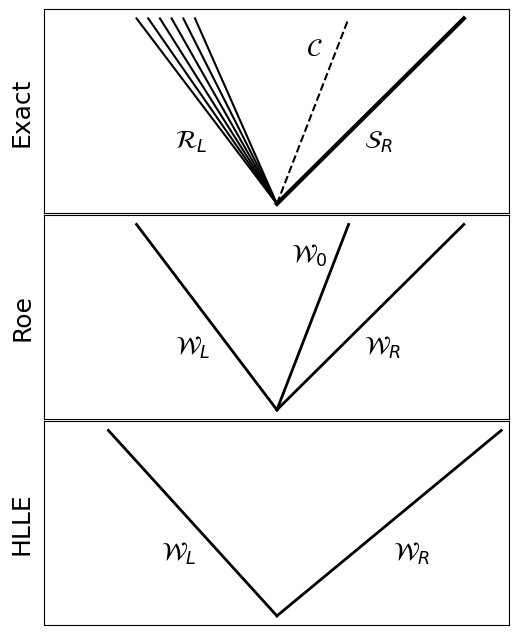

In [48]:
fig, axes = pyplot.subplots(3, 1, figsize=(6,8), sharex=True, gridspec_kw={'hspace':0.01})

dx = wave_l_x[1] - wave_l_x[0]
ndx = 6
for i in range(ndx):
    axes[0].plot([0, wave_l_x[0]+i*dx/ndx], [0, 1], 'k-')
axes[0].plot([0, wave_c_x], [0, 1], 'k--')
axes[0].plot([0, wave_r_x], [0, 1], 'k-', lw=3)
axes[0].set_ylabel('Exact')
axes[0].text(-0.35, 0.3, r"$\mathcal{R}_{L}$")
axes[0].text(0.1, 0.8, r"$\mathcal{C}$")
axes[0].text(0.3, 0.3, r"$\mathcal{S}_{R}$")

axes[1].plot([0, wave_l_x[0]], [0, 1], 'k-', lw=2)
axes[1].plot([0, wave_c_x], [0, 1], 'k-', lw=2)
axes[1].plot([0, wave_r_x], [0, 1], 'k-', lw=2)
axes[1].set_ylabel('Roe')
axes[1].text(-0.35, 0.3, r"$\mathcal{W}_{L}$")
axes[1].text(0.05, 0.8, r"$\mathcal{W}_0$")
axes[1].text(0.3, 0.3, r"$\mathcal{W}_{R}$")

axes[2].plot([0, 1.2*wave_l_x[0]], [0, 1], 'k-', lw=2)
axes[2].plot([0, 1.2*wave_r_x], [0, 1], 'k-', lw=2)
axes[2].set_ylabel('HLLE')
axes[2].text(-0.4, 0.3, r"$\mathcal{W}_{L}$")
axes[2].text(0.4, 0.3, r"$\mathcal{W}_{R}$")

for ax in axes.flatten():
    ax.set_xlim(-0.8, 0.8)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    
fig.savefig('RP2.svg', bbox_inches='tight')